In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
btslog_path = r'D:\userdata\anliu\Desktop'
btslog_name = r'SYSLOG_242.LOG'
btslog_file = os.path.join(btslog_path, btslog_name)

try:
    os.chdir(btslog_path)
except:
    print("The folder does not existed!")
    
# 读取文件返回文件每一行
def lines(file):
    for line in file:
        yield line


# 也能用于32 TRX的case
#[192.168.255.129]  d5 FSP-1338 <2019-03-10T04:59:13.262687Z> 24-CalibrationReceiver INF/ULPHY/CALIB#, TC:SFN:1.6.1,lncellId=2,port=34,TO=-464,Phase=-168.90,tmpRatio=1.0830,amp=0.1824,smtTO=-444,smtPhase=-169.31,Ep/No=32.19,peak=-1.
#[192.168.255.129]  f7 FSP-1337 <2019-03-10T05:02:51.004994Z> 24-CalibrationReceiver INF/ULPHY/CALIB#, RC:SFN:22.276.1,lncellId=2,port=6,TO=38,Phase=-176.85,tmpRatio=0.9741,AmpRatio=0.9741,smtTO=31,smtPhase=-176.78,Ep/No=40.18,peak=-1.
#[192.168.255.129]  17 FSP-1467 <2019-03-10T06:14:35.005081Z> 24-CalibrationReceiver INF/ULPHY/CALIB#, RC:SFN:442.596.1,lncellId=3,port=39,TO=-633716,Phase=-129.10,tmpRatio=+Inf,AmpRatio=+Inf,smtTO=0,smtPhase=0.00,Ep/No=8.48,peak=1.
# p_rc = r'(FSP-\d+)\s*<\d{4}-\d{2}-\d{2}T(\d{2}:\d{2}:\d{2}\.\d+)Z>.*RC:SFN:(\d+\.\d+\.\d+),lncellId=(\d+),port=(\d+),TO=(-?\d+),Phase=(-?\d+\.\d+),tmpRatio=(\d+\.\d+),AmpRatio=(\d+\.\d+),smtTO=(-?\d+),smtPhase=(-?\d+\.\d+),Ep\/No=(\d+\.\d+).*'    
# p_tc = r'(FSP-\d+)\s*<\d{4}-\d{2}-\d{2}T(\d{2}:\d{2}:\d{2}\.\d+)Z>.*TC:SFN:(\d+\.\d+\.\d+),lncellId=(\d+),port=(\d+),TO=(-?\d+),Phase=(-?\d+\.\d+),tmpRatio=(\d+\.\d+),amp=(\d+\.\d+),smtTO=(-?\d+),smtPhase=(-?\d+\.\d+),Ep\/No=(\d+\.\d+).*'

p_rc = r'(FSP-\d+)\s*<\d{4}-\d{2}-\d{2}T(\d{2}:\d{2}:\d{2}\.\d+)Z>.*RC:SFN:(\d+\.\d+\.\d+),lncellId=(\d+),port=(\d+),TO=(-?\d+),Phase=(-?\d+\.\d+),tmpRatio=(\d+\.\d+|[\+\-]+Inf),AmpRatio=(\d+\.\d+|[\+\-]+Inf),smtTO=(-?\d+),smtPhase=(-?\d+\.\d+),Ep\/No=(\d+\.\d+).*'  
p_tc = r'(FSP-\d+)\s*<\d{4}-\d{2}-\d{2}T(\d{2}:\d{2}:\d{2}\.\d+)Z>.*TC:SFN:(\d+\.\d+\.\d+),lncellId=(\d+),port=(\d+),TO=(-?\d+),Phase=(-?\d+\.\d+),tmpRatio=(\d+\.\d+),amp=(\d+\.\d+),smtTO=(-?\d+),smtPhase=(-?\d+\.\d+),Ep\/No=(\d+\.\d+).*'

time_rc = []
cid_rc = []
port_rc = []
epno_rc = []

time_tc = []
cid_tc = []
port_tc = []
epno_tc = []

with open(btslog_file) as f: 
    for line in lines(f):   
        rc_match = re.search(p_rc, line.strip(), flags=re.IGNORECASE)
        tc_match = re.search(p_tc, line.strip(), flags=re.IGNORECASE)
        if rc_match != None:  
            time_rc.append(rc_match.group(2))
            cid_rc.append(rc_match.group(4))
            port_rc.append(rc_match.group(5))
            epno_rc.append(rc_match.group(12))
        if tc_match != None:
            time_tc.append(tc_match.group(2))
            cid_tc.append(tc_match.group(4))
            port_tc.append(tc_match.group(5))
            epno_tc.append(tc_match.group(12))



rc_data = pd.DataFrame({'Time': time_rc, 'CellID': cid_rc, 'Port': port_rc, 'Ep/No': epno_rc})
tc_data = pd.DataFrame({'Time': time_tc, 'CellID': cid_tc, 'Port': port_tc, 'Ep/No': epno_tc}) 
rc_data['Ep/No'] = rc_data['Ep/No'].astype(float)
tc_data['Ep/No'] = tc_data['Ep/No'].astype(float)
rc_data['Port'] = rc_data['Port'].astype(int)
tc_data['Port'] = tc_data['Port'].astype(int)
rc_data['Time'] = pd.to_datetime(rc_data['Time'])
tc_data['Time'] = pd.to_datetime(tc_data['Time'])

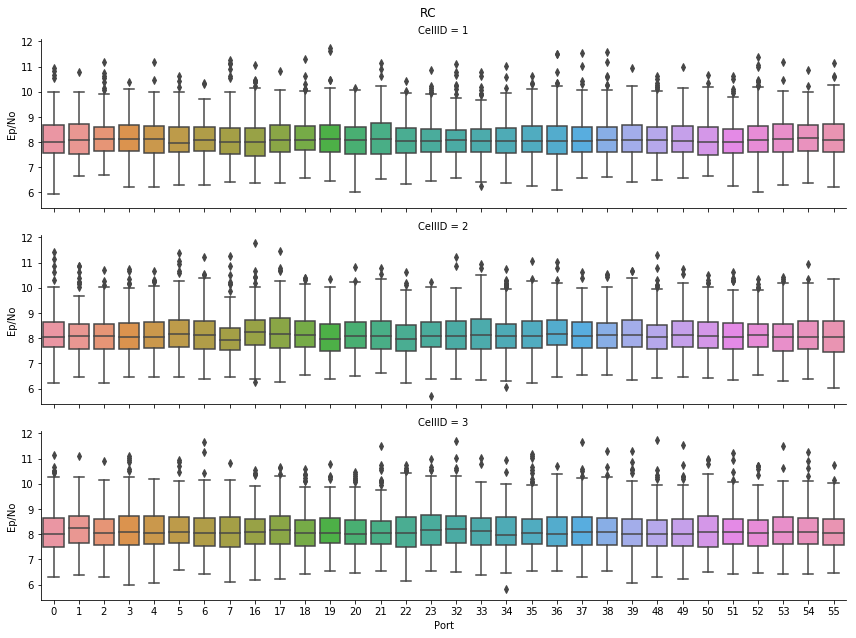

In [3]:
g = sns.catplot(x='Port', y="Ep/No", col='CellID', col_wrap=1, kind='box', data=rc_data, height=3, aspect=4.0)
plt.subplots_adjust(top=0.93)
g.fig.suptitle('RC')
g.savefig("RC.png")

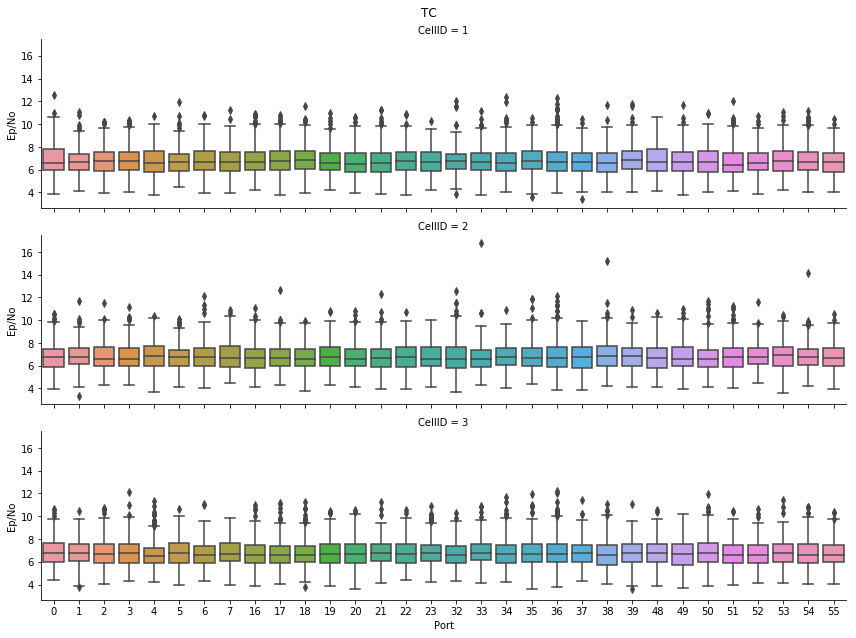

In [4]:
g = sns.catplot(x='Port', y="Ep/No", col='CellID', col_wrap=1, kind='box', data=tc_data, height=3, aspect=4.0)
plt.subplots_adjust(top=0.93)
g.fig.suptitle('TC')
g.savefig("TC.png")